# Preprocessing images 

# 1 - import dependnces 

In [19]:
import cv2
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import imageio
import os
import scipy.ndimage as ndi
from scipy import ndimage


C:\Users\Mahran\AppData\Local\Temp\ipykernel_10824\1316896228.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  combined_xray_images_1 = np.array(


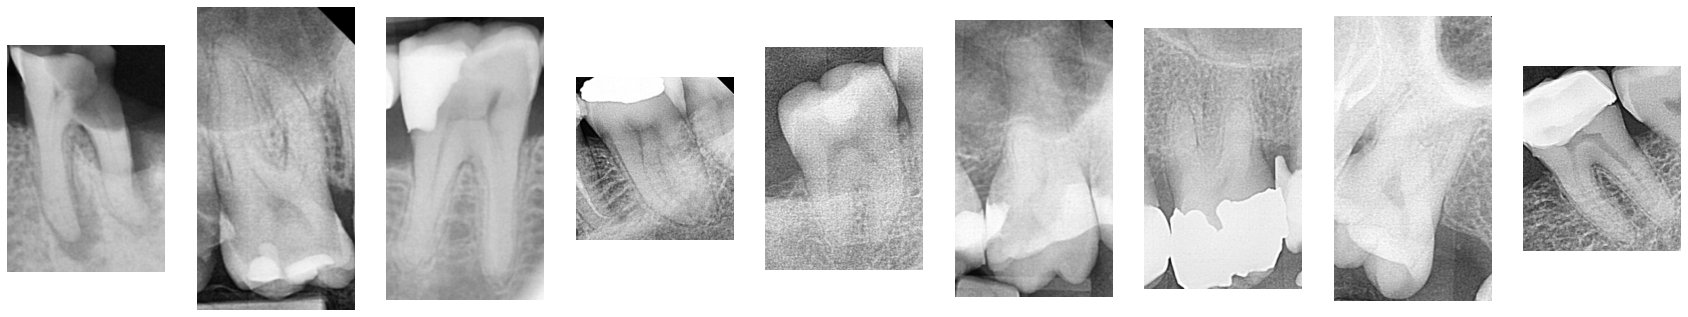

In [47]:
DIR = "Research Papers/Dataset/New Folder"
num_imgs = 9

combined_xray_images_1 = np.array(
    [imageio.imread(os.path.join(DIR, f"{i}.png")) for i in range(num_imgs)]
)

fig, axes = plt.subplots(nrows=1, ncols=num_imgs, figsize=(30, 30))

for img, ax in zip(combined_xray_images_1, axes):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

images have different sizes and different resultions . some of them noisy and some of them clear and some of them too bright

GOAL : to make a preprocessing pipeline to protrude features and have less error in the model

# 2- Try on one Example different transformations

In [14]:
# read an image from a path?
ray = cv2.imread("Dataset/First50/thumbnail_2.png")



# Trying to remove black background

In [15]:

# # Convert image to image gray
# tmp = cv2.cvtColor(xray, cv2.COLOR_BGR2GRAY)

# # Applying thresholding technique
# _, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)

# # Using cv2.split() to split channels
# # of coloured image
# b, g, r = cv2.split(xray)

# # Making list of Red, Green, Blue
# # Channels and alpha
# rgba = [b, g, r, alpha]

# # Using cv2.merge() to merge rgba
# # into a coloured/multi-channeled image
# xray = cv2.merge(rgba, 4)

# plt.imshow(xray, cmap="gray")
# plt.axis("off")
# plt.show()


## Grayscale and Equalize the images
### TODO: resize all images to have the same size

In [16]:
ray = cv2.cvtColor(ray,cv2.COLOR_BGR2RGB)

In [17]:
ray.dtype

dtype('uint8')

In [20]:
# xray = cv2.bilateralFilter(xray, 5, 75.0,75.0)
xrayGRAY= cv2.cvtColor(ray, cv2.COLOR_RGB2GRAY)
#####################################################
xraybi = cv2.bilateralFilter(xrayGRAY, 5, 75.0,75.0)
#####################################################
xraygaus = cv2.GaussianBlur(xrayGRAY,(5,5),1)
#####################################################
#SHARPENING
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# Apply the sharpening kernel to the image using filter2D
xraySHARP = cv2.filter2D(xrayGRAY, -1, kernel)
#####################################################
xraySHARPnGAUS =cv2.GaussianBlur(xraySHARP,(5,5),1)


# Applying Contrast Limited Adaptive Histogram Equalization (CLAHE) & regular historam equalization algorithms to the image

**Contrast Limited Adaptive Histogram Equalization (CLAHE)** to equalize images. CLAHE is a variant of **Adaptive histogram equalization (AHE)** which takes care of over-amplification of the contrast. CLAHE operates on small regions in the image, called tiles, rather than the entire image. The neighboring tiles are then combined using bilinear interpolation to remove the artificial boundaries. 
This algorithm can be applied to improve the contrast of images.

We can also apply CLAHE to color images, where usually it is applied on the luminance channel and the results after equalizing only the luminance channel of an HSV image are much better than equalizing all the channels of the BGR image. 
In this tutorial, we are going to learn how to apply CLAHE and process a given input image for histogram equalization.


When applying CLAHE, there are two parameters to be remembered:
- clipLimit – This parameter sets the threshold for contrast limiting. The default value is 40. 
- tileGridSize – This sets the number of tiles in the row and column. By default this is 8×8. It is used while the image is divided into tiles for applying CLAHE. 
 

In [21]:
# The declaration of CLAHE
# clipLimit -> Threshold for contrast limiting
xray_image= cv2.equalizeHist(xraybi)
clahe = cv2.createCLAHE(clipLimit = 3,tileGridSize = (5, 5))
clahe_final = clahe.apply(xraygaus)


In [39]:
#calculate the histogram of the image
# hist = ndi.histogram(xray_image,min=0,max=255,bins=256)
# cdf = hist.cumsum()  /hist.sum()
# im_equalized = cdf[xray_image]*255
# import the library opencv
import cv2
# globbing utility.
import glob
# select the path
path = "Dataset/First50/*.png*"
for bb,images in enumerate (sorted((glob.glob(path)),key=os.path.getmtime),start=1):

    img = cv2.imread(images)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # #configure CLAHE
    clahe = cv2.createCLAHE(clipLimit=3,tileGridSize=(8,8))
    img = clahe.apply(img)
    img =cv2.GaussianBlur(img,(5,5),1)

    # #0 to 'L' channel, 1 to 'a' channel, and 2 to 'b' channel
    # img[:,:,0] = clahe.apply(img[:,:,0])

    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img=cv2.imwrite("Dataset/output/thumbnail_{}.png".format(bb),img)






    

In [40]:
import pandas as pd
df  = pd.read_csv('Dataset/First50/Lables.csv')

In [57]:
df[df['Total Score'].str.contains('10')]

,Unnamed: 0,Path,Angle of Access,Angle of Curvature,S-shaped curve,Dilacerated curve,Curve course,Curve No.,Curve Location,Canal visibility,Apical periodontitis,Provisional Root length,Total Score


In [58]:
df

,Unnamed: 0,Path,Angle of Access,Angle of Curvature,S-shaped curve,Dilacerated curve,Curve course,Curve No.,Curve Location,Canal visibility,Apical periodontitis,Provisional Root length,Total Score
0,0,Dataset/First50/thumbnail_1.png,'Easy','Moderate <25 degrees','No','No','Gradual','Multiple','middle-apical','invisible','present','Long>22mm','4'
1,1,Dataset/First50/thumbnail_2.png,'Difficult','Severe >25','Yes','Yes','Abrupt','Multiple','coronal-middle','invisible','absent','<22mm','8'
2,2,Dataset/First50/thumbnail_3.png,'Easy','Moderate <25 degrees','No','No','Gradual','Multiple','middle-apical','invisible','absent','<22mm','2'
3,3,Dataset/First50/thumbnail_4.png,'Easy','Moderate <25 degrees','No','No','Gradual','Multiple','middle-apical','invisible','absent','<22mm','2'
4,4,Dataset/First50/thumbnail_5.png,'Easy','Moderate <25 degrees','No','No','Gradual','Multiple','middle-apical','visible','absent','<22mm','1'
5,5,Dataset/First50/thumbnail_6.png,'Easy','Moderate <25 degrees','No','No','Gradual','Multiple','coronal-middle','visible','absent','<22mm','2'
6,6,Dataset/First50/thumbnail_7.png,'Difficult','Moderate <25 degrees','No','No','Abrupt','Multiple','coronal-middle','invisible','absent','<22mm','5'
7,7,Dataset/First50/thumbnail_8.png,'Difficult','Moderate <25 degrees','No','No','Gradual','Multiple','middle-apical','invisible','absent','<22mm','3'
8,8,Dataset/First50/thumbnail_9.png,'Difficult','Moderate <25 degrees','No','No','Gradual','Multiple','middle-apical','invisible','absent','Long>22mm','4'
9,9,Dataset/First50/thumbnail_10.png,'Difficult','Severe >25','No','Yes','Gradual','Multiple','middle-apical','invisible','absent','Long>22mm','6'


In [38]:
path = "Dataset/First50/*.png*"
for bb,images in enumerate (sorted((glob.glob(path)),key=os.path.getmtime),start=1):
    print(images)

Dataset/First50\thumbnail_1.png
Dataset/First50\thumbnail_2.png
Dataset/First50\thumbnail_3.png
Dataset/First50\thumbnail_4.png
Dataset/First50\thumbnail_5.png
Dataset/First50\thumbnail_6.png
Dataset/First50\thumbnail_7.png
Dataset/First50\thumbnail_8.png
Dataset/First50\thumbnail_9.png
Dataset/First50\thumbnail_10.png
Dataset/First50\thumbnail_11.png
Dataset/First50\thumbnail_12.png
Dataset/First50\thumbnail_13.png
Dataset/First50\thumbnail_14.png
Dataset/First50\thumbnail_15.png
Dataset/First50\thumbnail_16.png
Dataset/First50\thumbnail_17.png
Dataset/First50\thumbnail_18.png
Dataset/First50\thumbnail_19.png
Dataset/First50\thumbnail_20.png
Dataset/First50\thumbnail_21.png
Dataset/First50\thumbnail_22.png
Dataset/First50\thumbnail_23.png
Dataset/First50\thumbnail_24.png
Dataset/First50\thumbnail_25.png
Dataset/First50\thumbnail_26.png
Dataset/First50\thumbnail_27.png
Dataset/First50\thumbnail_28.png
Dataset/First50\thumbnail_29.png
Dataset/First50\thumbnail_30.png
Dataset/First50\thu

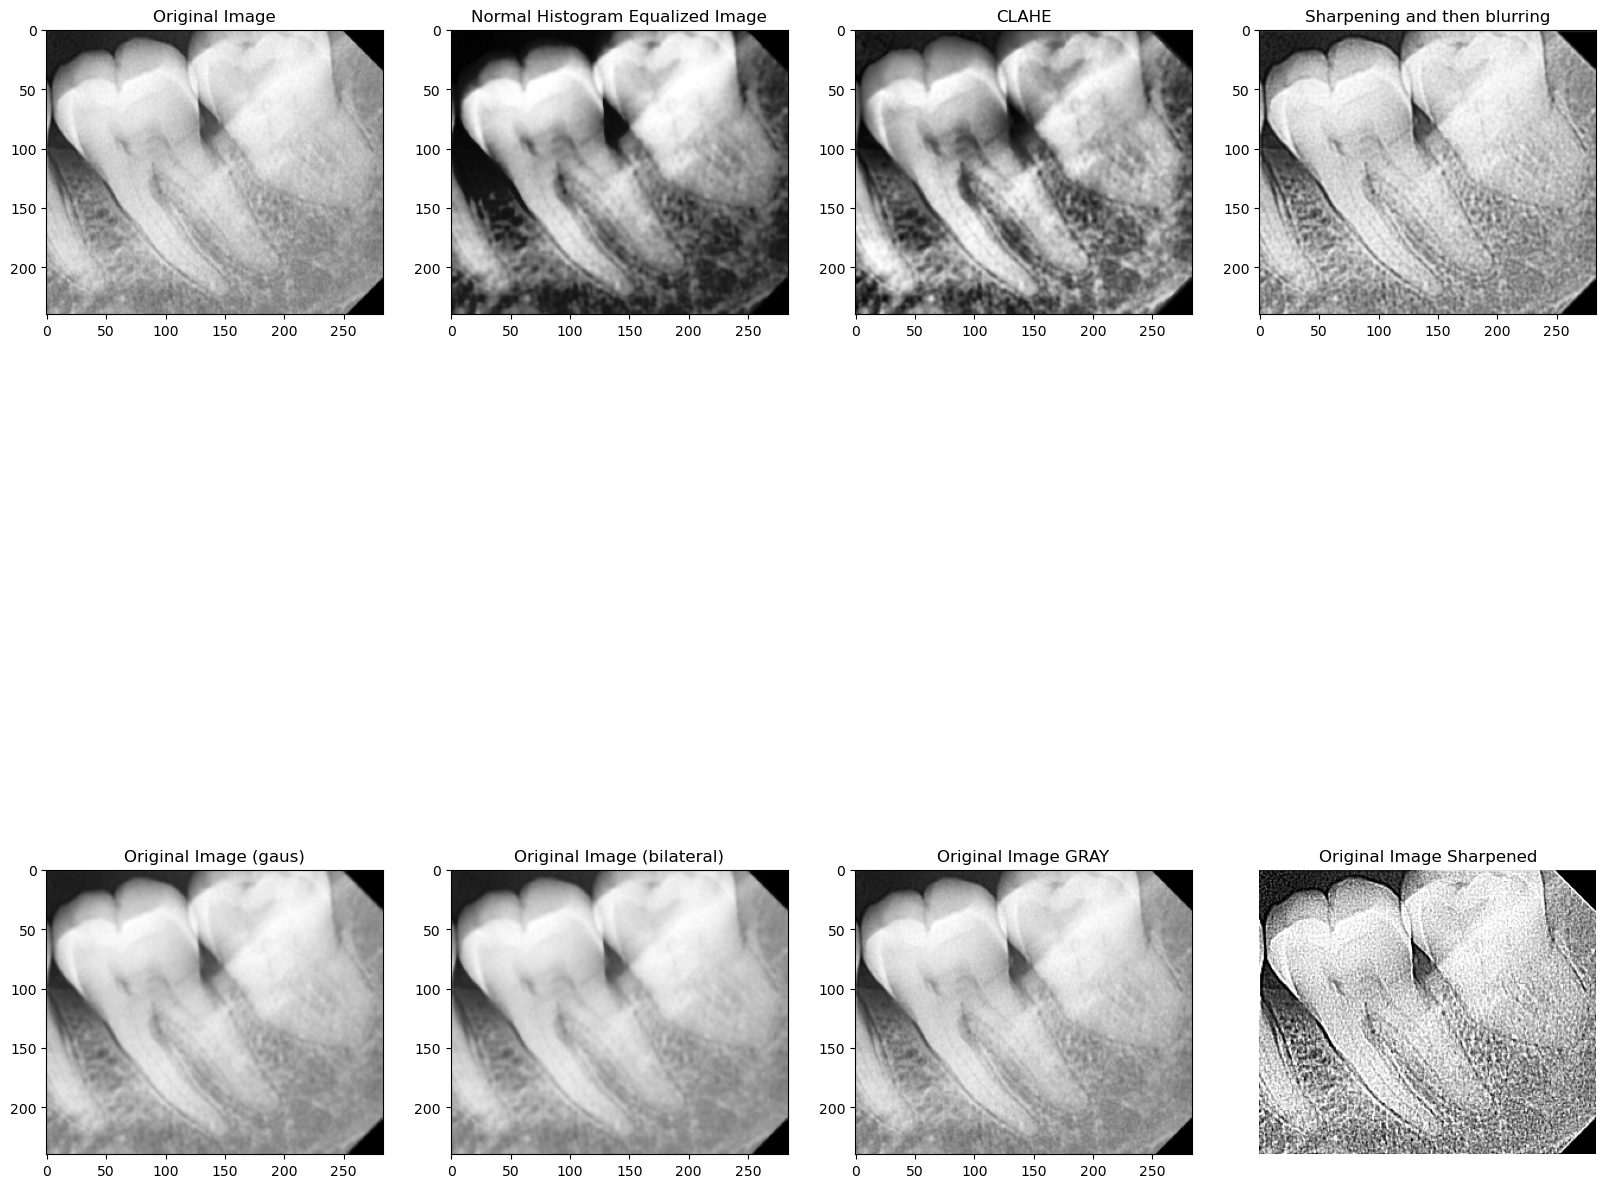

In [31]:
fig , axes =plt.subplots(2,4,figsize=(20,20))
axes[0][0].imshow(ray)
axes[0][0].set_title("Original Image")

axes[0][1].imshow(xray_image,cmap='gray')
axes[0][1].set_title("Normal Histogram Equalized Image")

axes[0][2].imshow(clahe_final,cmap='gray')
axes[0][2].set_title("CLAHE")

axes[0][3].imshow(xraySHARPnGAUS,cmap='gray')
axes[0][3].set_title("Sharpening and then blurring")

#----------------------------------------------------------------------
axes[1][0].imshow(xraygaus,cmap='gray')
axes[1][0].set_title("Original Image (gaus)")

axes[1][1].imshow(xraybi,cmap='gray')
axes[1][1].set_title("Original Image (bilateral)")

axes[1][2].imshow(xrayGRAY,cmap='gray')
axes[1][2].set_title("Original Image GRAY")

axes[1][3].imshow(xraySHARP,cmap='gray')
axes[1][3].set_title("Original Image Sharpened")
plt.axis('off')
plt.show()

## Plotting the pixle Intensity distribution of the images

In [19]:
pixel_intensity_orig = ndimage.histogram(ray, min=np.min(ray), max=np.max(ray), bins=256)
pixel_intensity_hist = ndimage.histogram(xray_image, min=np.min(xray_image), max=np.max(xray_image), bins=256)
pixel_intensity_clahe = ndimage.histogram(clahe_final, min=np.min(clahe_final), max=np.max(clahe_final), bins=256)

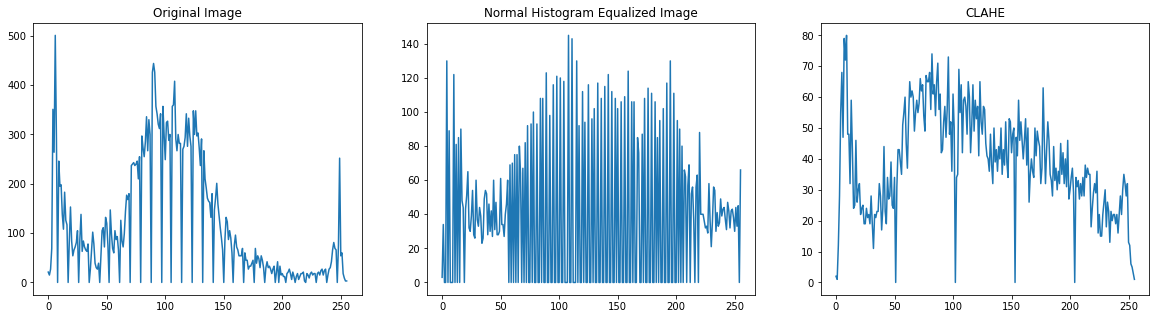

In [20]:
ig , axes =plt.subplots(1,3,figsize=(20,5))
axes[0].plot(pixel_intensity_orig)
axes[0].set_title("Original Image")
axes[1].plot(pixel_intensity_hist)
axes[1].set_title("Normal Histogram Equalized Image")
axes[2].plot(pixel_intensity_clahe)
axes[2].set_title("CLAHE")
plt.show()

# Trying Laplacian-Gaussian Edge detection 
## a common technique used to extract features from an image , if features are visible then this means it will be visible to the model 

In [21]:
xray_image_laplace_gaussian = ndimage.gaussian_laplace(clahe_final, sigma=1)

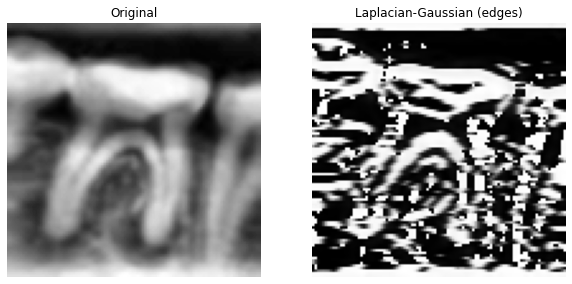

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(clahe_final, cmap="gray")
axes[1].set_title("Laplacian-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

# Sobel filter

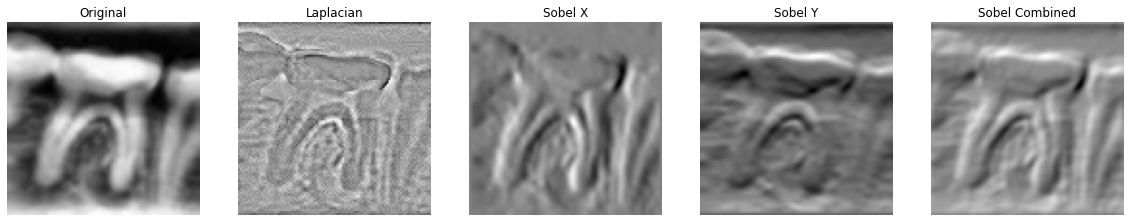

In [23]:
laplacian = cv.Laplacian(clahe_final,cv.CV_64F)
sobelx = cv.Sobel(clahe_final, cv.CV_64F ,1,0,ksize=5)
sobely = cv.Sobel(clahe_final, cv.CV_64F ,0,1,ksize=5)
sobel = sobelx+sobely 


fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

axes[0].set_title("Original")
axes[0].imshow(clahe_final, cmap="gray")

axes[1].set_title("Laplacian")
axes[1].imshow(laplacian, cmap="gray")

axes[2].set_title('Sobel X')
axes[2].imshow(sobelx,cmap = 'gray')

axes[3].set_title("Sobel Y")
axes[3].imshow(sobely,cmap = 'gray')

axes[4].set_title("Sobel Combined")
axes[4].imshow(sobel,cmap = 'gray')

for i in axes:
    i.axis("off")
plt.show()

# CO-OCCURENCE MATRIX

# Canny edge detection 

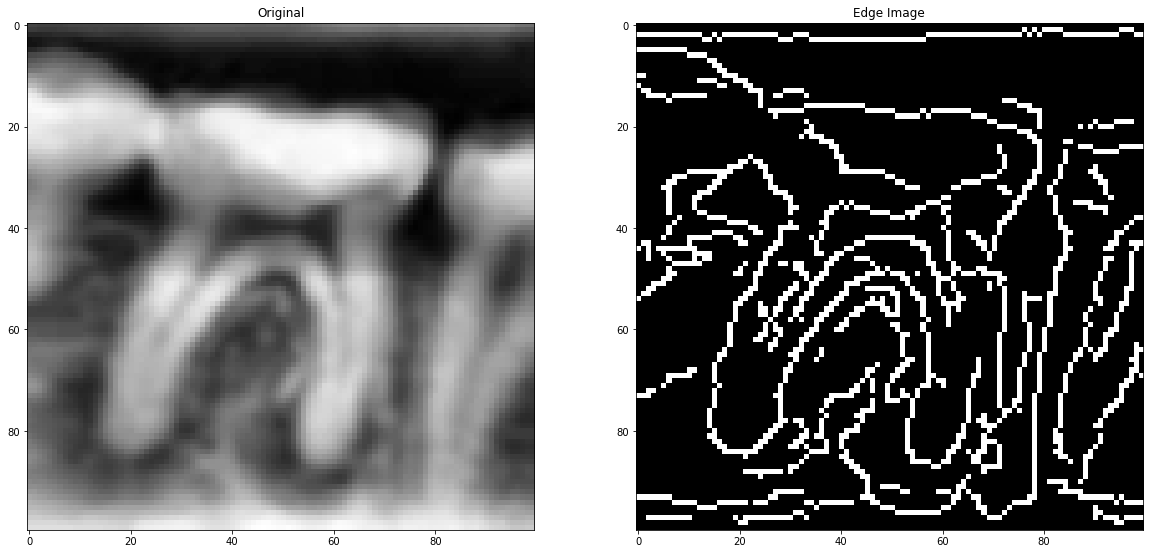

In [24]:
edges = cv.Canny(clahe_final,50,150)
# plt.subplot(121),plt.imshow(clahe_final,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))

axes[0].set_title("Original")
axes[0].imshow(clahe_final, cmap="gray")

axes[1].set_title("Edge Image")
axes[1].imshow(edges, cmap="CMRmap")

In [25]:
x_sobel = ndimage.sobel(clahe_final, axis=0)
y_sobel = ndimage.sobel(clahe_final, axis=1)

xray_image_sobel = np.hypot(x_sobel, y_sobel)

xray_image_sobel *= 255.0 / np.max(xray_image_sobel)

In [26]:
print("The data type - before: ", xray_image_sobel.dtype)

xray_image_sobel = xray_image_sobel.astype("float32")

print("The data type - after: ", xray_image_sobel.dtype)

The data type - before:  float16
The data type - after:  float32


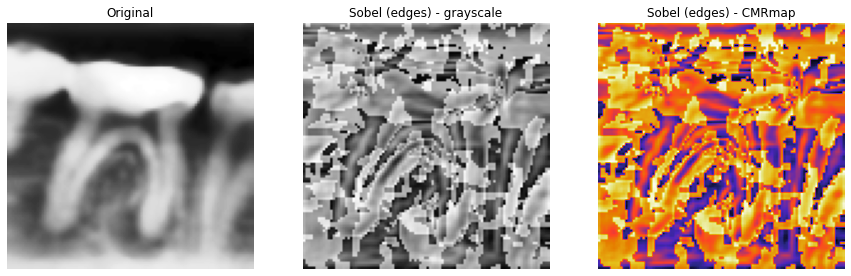

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Sobel (edges) - grayscale")
axes[1].imshow(xray_image_sobel, cmap="gray")
axes[2].set_title("Sobel (edges) - CMRmap")
axes[2].imshow(xray_image_sobel, cmap="CMRmap")
for i in axes:
    i.axis("off")
plt.show()

In [28]:
fourier_gaussian = ndimage.fourier_gaussian(clahe_final, sigma=0.05)

x_prewitt = ndimage.prewitt(fourier_gaussian, axis=0)
y_prewitt = ndimage.prewitt(fourier_gaussian, axis=1)

xray_image_canny = np.hypot(x_prewitt, y_prewitt)

xray_image_canny *= 255.0 / np.max(xray_image_canny)

print("The data type - ", xray_image_canny.dtype)

The data type -  float64


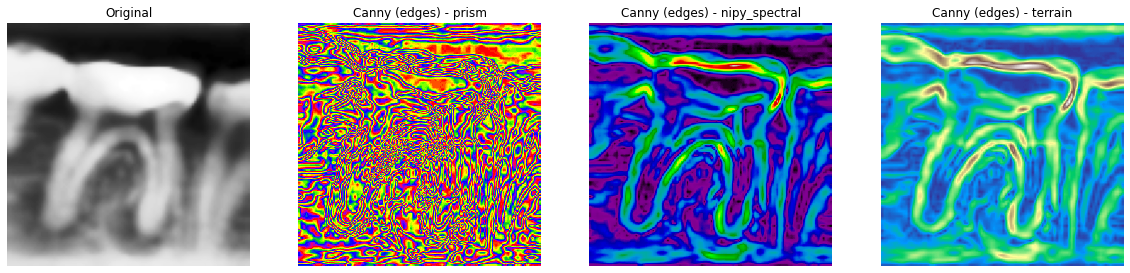

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Canny (edges) - prism")
axes[1].imshow(xray_image_canny, cmap="prism")
axes[2].set_title("Canny (edges) - nipy_spectral")
axes[2].imshow(xray_image_canny, cmap="nipy_spectral")
axes[3].set_title("Canny (edges) - terrain")
axes[3].imshow(xray_image_canny, cmap="terrain")
for i in axes:
    i.axis("off")
plt.show()

In [30]:
print("The data type of the X-ray image is: ", xray_image.dtype)
print("The minimum pixel value is: ", np.min(xray_image))
print("The maximum pixel value is: ", np.max(xray_image))
print("The average pixel value is: ", np.mean(xray_image))
print("The median pixel value is: ", np.median(xray_image))

The data type of the X-ray image is:  uint8
The minimum pixel value is:  0
The maximum pixel value is:  255
The average pixel value is:  128.4509
The median pixel value is:  128.0


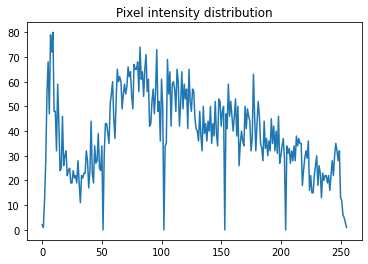

In [31]:
pixel_intensity_distribution = ndimage.histogram(clahe_final, min=np.min(clahe_final), max=np.max(clahe_final), bins=256)

plt.plot(pixel_intensity_distribution)
plt.title("Pixel intensity distribution")
plt.show()

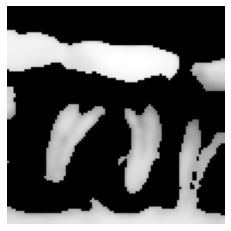

In [32]:
# The threshold is "greater than 150"
# Return the original image if true, `0` otherwise
xray_image_mask_noisy = np.where(clahe_final > 150, xray_image, 0)

plt.imshow(xray_image_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()

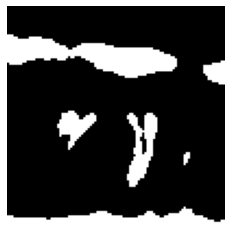

In [33]:
# The threshold is "greater than 150"
# Return `1` if true, `0` otherwise
xray_image_mask_less_noisy = np.where(clahe_final > 190, 1, 0)

plt.imshow(xray_image_mask_less_noisy, cmap="gray")
plt.axis("off")
plt.show()

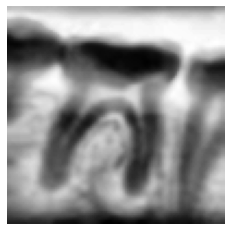

In [34]:
mask3 = ~xray_image_mask_less_noisy+~clahe_final
plt.imshow(mask3, cmap="gray")
plt.axis("off")
plt.show()

<center> Thresholding <center>

In [35]:
THRESH = clahe_final.min()+ 0.9 * (clahe_final.max()-clahe_final.min())
print(THRESH)

228.9


In [47]:
DILATE_KERNEL = np.ones((5, 5), np.uint8)
# image = cv2.equalizeHist(img)

#gausBLUR = cv2.GaussianBlur(image,(5,5),1)

# bi = cv2.bilateralFilter(image, 5, 75.0,75.0)

MASK = cv2.adaptiveThreshold(clahe_final,256, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 15, 11)

mask_dilate = cv2.dilate(MASK, DILATE_KERNEL, iterations=1)


MASK_FINALE = cv2.bitwise_and(clahe_final,MASK)

RES = np.hstack((MASK_FINALE, MASK))

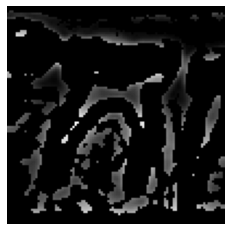

In [48]:
plt.imshow(MASK_FINALE, cmap="gray")
plt.axis("off")
plt.show((20,20))

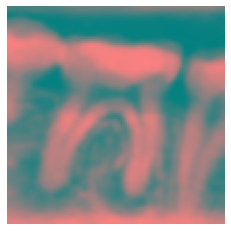

In [49]:
xrayRGB = cv2.cvtColor(clahe_final, cv2.COLOR_GRAY2RGB)
xrayLAB = cv2.cvtColor(xrayRGB,cv2.COLOR_RGB2LAB)
plt.imshow(xrayLAB,cmap='gray')
plt.axis("off")
plt.show((20,20))

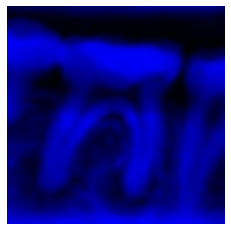

In [50]:
xrayHSV = cv2.cvtColor(xrayRGB, cv2.COLOR_RGB2HSV)
plt.imshow(xrayHSV)
plt.axis("off")
plt.show((20,20))

In [51]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

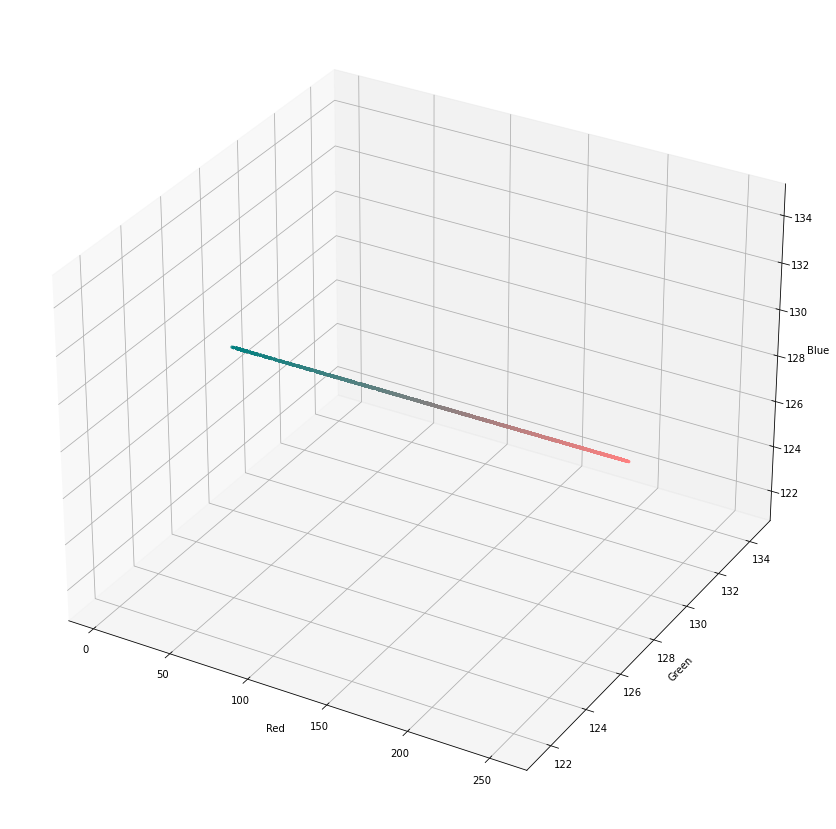

In [52]:
r, g, b = cv2.split(xrayLAB)
fig = plt.figure(figsize=(15,15))
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = xrayLAB.reshape((np.shape(xrayLAB)[0]*np.shape(xrayLAB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [303]:
high = (100, 100, 100)
low = (0, 0, 0)

In [304]:
mask = cv2.inRange(xrayHSV, low,high)

In [305]:
result = cv2.bitwise_and(ray, ray, mask=mask)

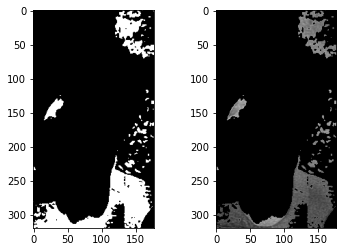

In [306]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [ ]:
# import the library opencv
import cv2
# globbing utility.
import glob
# select the path
path = "Dataset/First50/*.*"
for bb,images in enumerate (glob.glob(path),start=1):

    images = cv2.imread(images)
    old_size = images.shape[:2]  # old_size is in (height, width) format

    ratio = float(desired_size) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])

    # new_size should be in (width, height) format

    images = cv2.resize(images, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    color = [0, 0, 0]
    images = cv2.copyMakeBorder(images, top, bottom, left, right, cv2.BORDER_CONSTANT,value=color)
    images=cv2.imwrite("Dataset/output/thumbnail_{}.png".format(bb),images)